# OIL price prediction

#### Europe Brent Spot Prices (Daily) from EIA U.S. (Energy Information Administration).

### Data
#### This series is available through the EIA open data API

    - Europe Brent Spot Price FOB (Dollars per Barrel) - From 03 October 2016 till 22 November 2021
    
    link :- https://www.eia.gov/dnav/pet/hist/rbrteD.htm

### Definition

- Brent : A blended crude stream produced in the North Sea region which serves as a reference or "marker" for pricing a number of other crude streams (https://www.eia.gov/dnav/pet/TblDefs/pet_pri_spt_tbldef2.asp)

##### Note: We have tried extracting data from above source through scrapy but website is not giving permissions to scrape the data. Inaddition, this data can be downloaded from the website itself in excel file. However, to demostrate webscraping and Beautifulsoup modules we have used  (github.com). This data was uploaded in github. Moreover, We are going to use the latest data which is available in excel file from the parent website for our project.  

## Import liabraries

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api
import string
import spacy
import requests
from csv import writer
from bs4 import BeautifulSoup
import seaborn as sns
import statsmodels.formula.api as sm
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import requests
from csv import writer
from bs4 import BeautifulSoup
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# User define function for Brent
### Scrape the data

In [22]:
url= "https://github.com/datasets/oil-prices/blob/master/data/brent-daily.csv"
page = requests.get(url)

### Extract html data

In [23]:
soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('table', class_="js-csv-data csv-data js-file-line-container")

In [24]:
lists

[<table class="js-csv-data csv-data js-file-line-container">
 <thead>
 <tr class="js-file-line" id="LC1">
 <td class="blob-num js-line-number" data-line-number="1" id="L1"></td>
 <th>Date</th>
 <th>Price</th>
 </tr>
 </thead>
 <tbody>
 <tr class="js-file-line" id="LC2">
 <td class="blob-num js-line-number" data-line-number="2" id="L2"></td>
 <td>1987-05-20</td>
 <td>18.63</td>
 </tr>
 <tr class="js-file-line" id="LC3">
 <td class="blob-num js-line-number" data-line-number="3" id="L3"></td>
 <td>1987-05-21</td>
 <td>18.45</td>
 </tr>
 <tr class="js-file-line" id="LC4">
 <td class="blob-num js-line-number" data-line-number="4" id="L4"></td>
 <td>1987-05-22</td>
 <td>18.55</td>
 </tr>
 <tr class="js-file-line" id="LC5">
 <td class="blob-num js-line-number" data-line-number="5" id="L5"></td>
 <td>1987-05-25</td>
 <td>18.6</td>
 </tr>
 <tr class="js-file-line" id="LC6">
 <td class="blob-num js-line-number" data-line-number="6" id="L6"></td>
 <td>1987-05-26</td>
 <td>18.63</td>
 </tr>
 <tr c

### Searching for required fields from the above html format

### Declare string var
### Declare list

In [25]:
mydatastr = ''
lists = []

### Searching all tr in the html data
### storing as a string

In [26]:
for table in soup.find_all('tr'):
    mydatastr += table.get_text()

### set according to required format

In [27]:
mydatastr = mydatastr[1:]
itemlist = mydatastr.split("\n\n")
  
for item in itemlist[:-5]:
    lists.append(item.split("\n"))
  
lists

[['', 'Date', 'Price'],
 ['', '1987-05-20', '18.63'],
 ['', '1987-05-21', '18.45'],
 ['', '1987-05-22', '18.55'],
 ['', '1987-05-25', '18.6'],
 ['', '1987-05-26', '18.63'],
 ['', '1987-05-27', '18.6'],
 ['', '1987-05-28', '18.6'],
 ['', '1987-05-29', '18.58'],
 ['', '1987-06-01', '18.65'],
 ['', '1987-06-02', '18.68'],
 ['', '1987-06-03', '18.75'],
 ['', '1987-06-04', '18.78'],
 ['', '1987-06-05', '18.65'],
 ['', '1987-06-08', '18.75'],
 ['', '1987-06-09', '18.78'],
 ['', '1987-06-10', '18.78'],
 ['', '1987-06-11', '18.68'],
 ['', '1987-06-12', '18.78'],
 ['', '1987-06-16', '18.9'],
 ['', '1987-06-17', '19.03'],
 ['', '1987-06-18', '19.05'],
 ['', '1987-06-19', '19.05'],
 ['', '1987-06-22', '19.1'],
 ['', '1987-06-23', '18.9'],
 ['', '1987-06-24', '18.75'],
 ['', '1987-06-25', '18.7'],
 ['', '1987-06-26', '19.08'],
 ['', '1987-06-29', '19.15'],
 ['', '1987-06-30', '19.08'],
 ['', '1987-07-01', '18.98'],
 ['', '1987-07-02', '19.25'],
 ['', '1987-07-03', '19.33'],
 ['', '1987-07-06', '19

### Calling DataFrame constructor on list

In [28]:
df = pd.DataFrame(lists[:-8])
df

,0,1,2
0,,Date,Price
1,,1987-05-20,18.63
2,,1987-05-21,18.45
3,,1987-05-22,18.55
4,,1987-05-25,18.6
...,...,...,...
8428,,2020-07-30,42.98
8429,,2020-07-31,43.13
8430,,2020-08-03,43.76
8431,,2020-08-04,43.99


#### Inferences : Data from original website (eia.gov/) is not allowing to scrape. However, to demonstrate the web scraping using beautifulsoup we scraped the data from github. Albeit, we will not use this data for project as this dataset is not from a reliable source. As the data is available in .xlx format downloaded from official website

# Loading Dataset

In [5]:
oil=pd.read_excel("Brent.xls")
oil2=oil.copy()
oil2

,Date,SpotPrice
0,2016-10-03,48.61
1,2016-10-04,48.81
2,2016-10-05,49.57
3,2016-10-06,50.14
4,2016-10-07,50.49
...,...,...
1304,2021-11-16,82.85
1305,2021-11-17,80.67
1306,2021-11-18,82.45
1307,2021-11-19,80.24


In [6]:
oil['Year']=oil['Date'].dt.strftime('%y')
oil['Month']=oil['Date'].dt.strftime('%m')
oil['date']=oil['Date'].dt.strftime('%d')
oil['wkday']=oil['Date'].dt.strftime('%A')

In [7]:
oil

,Date,SpotPrice,Year,Month,date,wkday
0,2016-10-03,48.61,16,10,03,Monday
1,2016-10-04,48.81,16,10,04,Tuesday
2,2016-10-05,49.57,16,10,05,Wednesday
3,2016-10-06,50.14,16,10,06,Thursday
4,2016-10-07,50.49,16,10,07,Friday
...,...,...,...,...,...,...
1304,2021-11-16,82.85,21,11,16,Tuesday
1305,2021-11-17,80.67,21,11,17,Wednesday
1306,2021-11-18,82.45,21,11,18,Thursday
1307,2021-11-19,80.24,21,11,19,Friday


In [8]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder=OneHotEncoder()

In [9]:
df=pd.DataFrame(OneHotEncoder.fit_transform(oil[['Month']]).toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df=df.rename(columns={0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'July',7:'Aug',8:'sep',9:'Oct',10:'Nov',11:'Dec',})

In [11]:
df=df[['Jan','Feb','Mar','Apr','May','Jun','July','Aug','sep','Oct','Nov','Dec']].astype(int)

In [12]:
oil['Jan']=df['Jan']

In [13]:
oil[['Feb','Mar','Apr','May','Jun','July','Aug','sep','Oct','Nov','Dec']]=df[['Feb','Mar','Apr','May','Jun','July','Aug','sep','Oct','Nov','Dec']]

In [14]:
oil['t']=np.arange(1,1310)
oil

,Date,SpotPrice,Year,Month,date,wkday,Jan,Feb,Mar,Apr,May,Jun,July,Aug,sep,Oct,Nov,Dec,t
0,2016-10-03,48.61,16,10,03,Monday,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2016-10-04,48.81,16,10,04,Tuesday,0,0,0,0,0,0,0,0,0,1,0,0,2
2,2016-10-05,49.57,16,10,05,Wednesday,0,0,0,0,0,0,0,0,0,1,0,0,3
3,2016-10-06,50.14,16,10,06,Thursday,0,0,0,0,0,0,0,0,0,1,0,0,4
4,2016-10-07,50.49,16,10,07,Friday,0,0,0,0,0,0,0,0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2021-11-16,82.85,21,11,16,Tuesday,0,0,0,0,0,0,0,0,0,0,1,0,1305
1305,2021-11-17,80.67,21,11,17,Wednesday,0,0,0,0,0,0,0,0,0,0,1,0,1306
1306,2021-11-18,82.45,21,11,18,Thursday,0,0,0,0,0,0,0,0,0,0,1,0,1307
1307,2021-11-19,80.24,21,11,19,Friday,0,0,0,0,0,0,0,0,0,0,1,0,1308


In [15]:
oil['Date'] = pd.to_datetime(oil.Date)


In [16]:
day_of_week_columns = pd.get_dummies(oil['wkday'])
oil.merge(day_of_week_columns, left_index=True, right_index=True)

,Date,SpotPrice,Year,Month,date,wkday,Jan,Feb,Mar,Apr,...,sep,Oct,Nov,Dec,t,Friday,Monday,Thursday,Tuesday,Wednesday
0,2016-10-03,48.61,16,10,03,Monday,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2016-10-04,48.81,16,10,04,Tuesday,0,0,0,0,...,0,1,0,0,2,0,0,0,1,0
2,2016-10-05,49.57,16,10,05,Wednesday,0,0,0,0,...,0,1,0,0,3,0,0,0,0,1
3,2016-10-06,50.14,16,10,06,Thursday,0,0,0,0,...,0,1,0,0,4,0,0,1,0,0
4,2016-10-07,50.49,16,10,07,Friday,0,0,0,0,...,0,1,0,0,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2021-11-16,82.85,21,11,16,Tuesday,0,0,0,0,...,0,0,1,0,1305,0,0,0,1,0
1305,2021-11-17,80.67,21,11,17,Wednesday,0,0,0,0,...,0,0,1,0,1306,0,0,0,0,1
1306,2021-11-18,82.45,21,11,18,Thursday,0,0,0,0,...,0,0,1,0,1307,0,0,1,0,0
1307,2021-11-19,80.24,21,11,19,Friday,0,0,0,0,...,0,0,1,0,1308,1,0,0,0,0


In [17]:
oil['t_square']=np.square(oil['t'])

In [29]:
oil['Log_spotprice']=np.log(oil['SpotPrice'])

## Visualizations

## Heatmap

<AxesSubplot:xlabel='Month', ylabel='Year'>

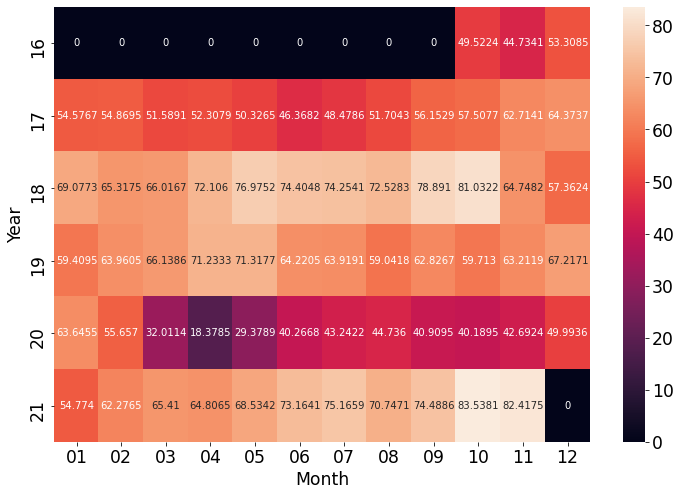

In [19]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=oil,values="SpotPrice",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

Inferences: The above heat map depicts overall story of Brent crude oil prices from Oct 2016 to Nov 2021. This map has mean values of per barrel price in USD of Brent crude oil of each month in each year. On Y axis we have Year and on X axis we have month. In addition, each cell is filled with average price of Crude oil.

It is evident that this dataset is having data from Oct 2016 to Nov 2021. As in map, the year 2016 has some months containing values as 0 and in year 2021 Dec column shows as value 0 because we do not have data for these months in our dataset.

The darker the colour the lesser the value and vice versa, lightest the colour the highest the value.

This heatmap shows that the average price of crude oil per barrel was high in Oct 2018 with average value as 81.032 and due to pandemic and amid global crisis these prices shows a steep downfall in Apr 2020 to as low as 18.37. Moreover, the all time high prices can be seen in recent months post epidemic in the month of Oct 2021 as high as 83.53 with continuation of rally in following month of Nov 2021 with price as 82.41. Finally, we can say that the prices are getting normal and touching highest which is a good symbol that now we have a stable demand of crude oil.



In [30]:
oil2.rename(columns={'SpotPrice':'Price'},inplace=True)

In [31]:
##Setting Date as Index
oil2.set_index('Date',inplace=True)


In [32]:
oil2.head()

,Price
Date,
2016-10-03,48.61
2016-10-04,48.81
2016-10-05,49.57
2016-10-06,50.14
2016-10-07,50.49


In [33]:
oil2.shape

(1309, 1)

### Line Plot

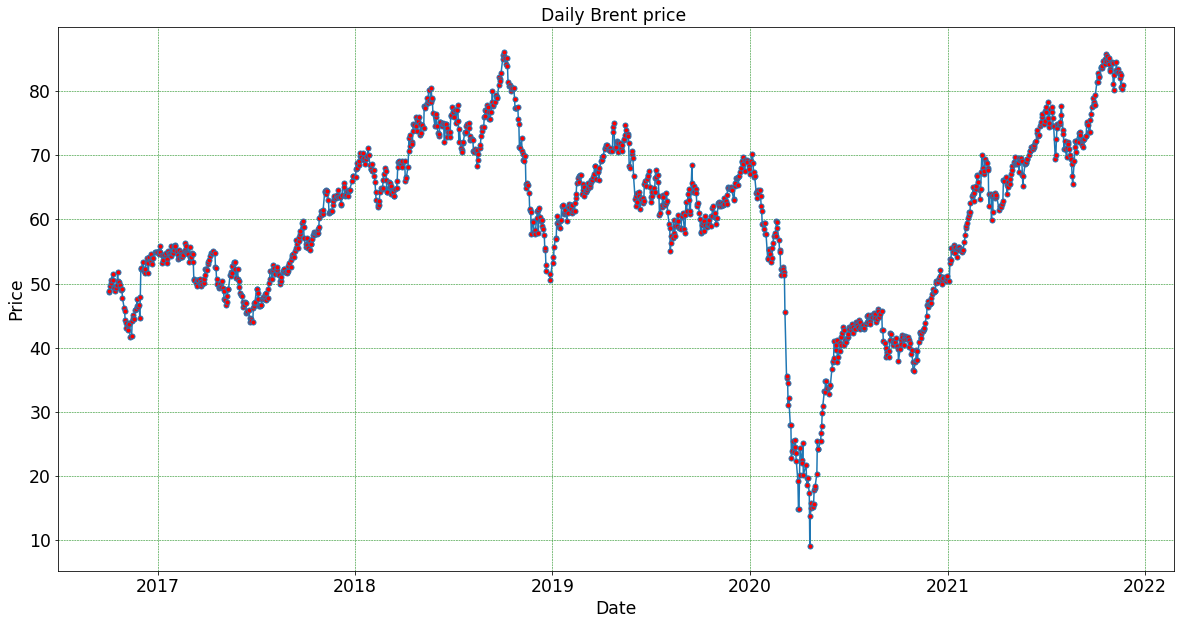

In [34]:
plt.figure(figsize=(20,10))
plt.title("Daily Brent price ")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(oil2, marker = 'o', ms = 5, mfc = 'r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

Inferences :
Trend:
The price was steady till end of 2019 ($50 to $70) 
At the beginning of 2020, oil prices had declined by about $20 a barrel due to Covid,
 It was observed that after the drop, towards the beginning of 2021 price started to climb to the precovid numbers.

Seasonality :
We can  see some weak seasonality from the data.
Stationarity:
As the Mean is changing in different time period we can say the data is not stationary.

## Histogram and Density Plot

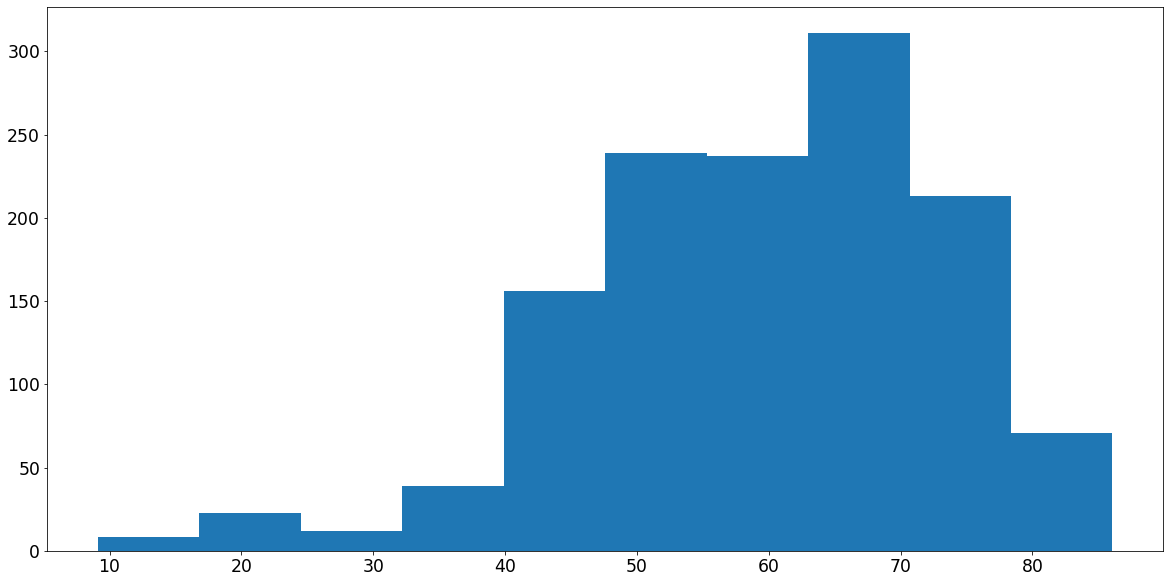

In [36]:
plt.figure(figsize=(20,10))
plt.subplot()
plt.hist(oil2)
plt.show()

<Figure size 1440x720 with 0 Axes>

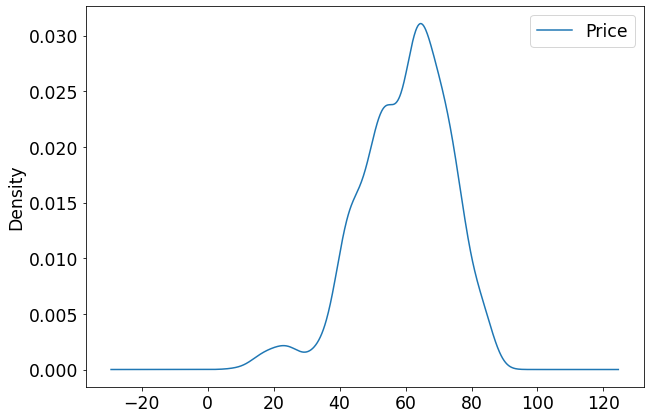

In [37]:
plt.figure(figsize=(20,10))
oil2.plot(kind='kde')
plt.show()

Inferences :
Most frequent values of Brent are in the range of 61 to 69.
The Brent oil price values from 0 to 35 are less frequent.
It show the data doesn't follow Normal Distribution.
Left skewed data


## Box Plot

In [38]:
## Temporary DataFrame
temp_data = oil2
temp_data['Year'] = oil2.index.year

Text(0.5, 1.0, 'Box Plot Year Wise-WTI')

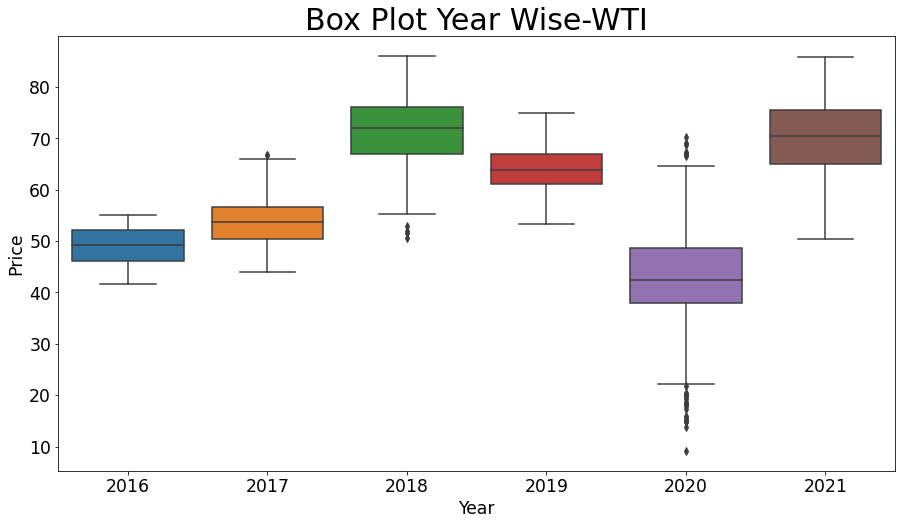

In [39]:
##Box Plot Year Wise Brent
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['Price'])
ax.set_title('Box Plot Year Wise-WTI',fontsize=30)

Inferences  :-
2017(june) to  2018 (oct) was the boom year for oil market.
Years 2018 and 2020 show outliers.
2018
The price of oil dropped in November 2018 because of a number of factors, including "rising petro-nations' oil production, the U.S. shale oil boom, and swelling in North American oil inventories," according to Market Watch.

2020
As rising Covid cases prompted fears of demand slowdown, due to that the price of the oil dropped.


## Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

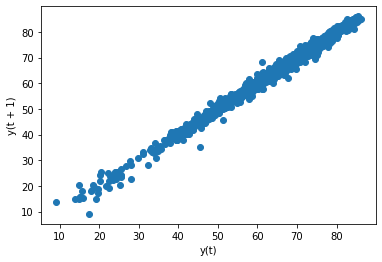

In [27]:
from pandas.plotting import lag_plot

lag_plot(oil2['Price'])

A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis

The difference between these time units is called lag.

Inferences  :-
Lag plot indicates that oil prices had good positive correlation relationship.
Hence,this series is good for time series modelling as its showing autoregressive nature.

lag scatter plot gives a Positive correction relationship . Hence they can be modelled.


## AutoCorrelation Function (ACF)

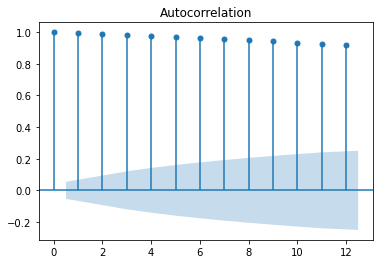

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(oil2['Price'], lags=12)
plt.show()

## Partial AutoCorrelation Function (PCAF)

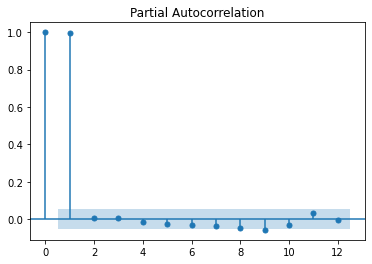

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(oil2['Price'],lags=12)
plt.show()

## In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

To check the autocorrelation between the lagged values(yt - yt-1) at any stage is strong enough to build a model we will use the concept of 

ACF (Autocorrelation Function)
PACF(Partial Autocorrelation Function)

Inferences : 

In this plot, the two dotted lines on either sides of 0 are the confidence intervals. These can be used to determine the ‘p’ and ‘q’ values as:
p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
q– The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.
